## Ejercicio de Platzi
Tenemos una tabla de la cantidad de dinero gastada en marketing vs la cantidad de dinero producida.

Necesito una grafica de regresion lineal con esos datos

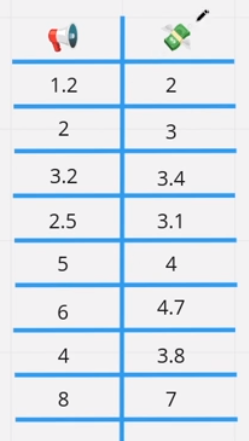

## Ejercicio sin Numpy

In [50]:
import matplotlib.pyplot as plt

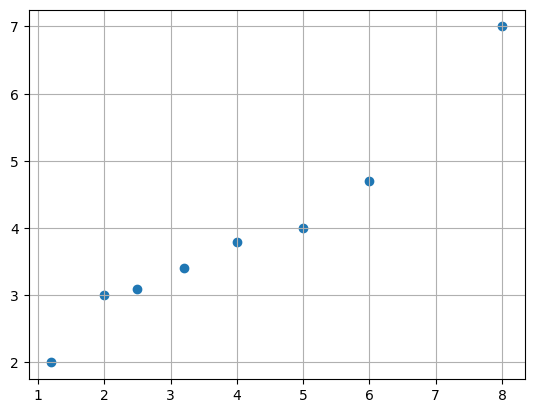

In [51]:
# Pasmos los datos a listas

x = [1.2,2,3.2,2.5,5,6,4,8] # Gastado en marketing
y = [2,3,3.4,3.1,4,4.7,3.8,7] # Ganado por el marketing

plt.scatter(x,y) # Graficamos
plt.grid()

## Regresion lineal


Sabiendo que f(x) = mx + b 

Donde m y b son R


Entonces:``
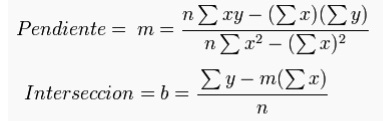

In [52]:
#Definimos nExy

def sum_xy(x,y):
    xy = 0
    for i in range(len(x)):
        xy += x[i] * y[i]
    return xy

sum_xy(x,y)

146.43

In [53]:
# Definimos nEx^2

def sum_x2(x):
    x2 = 0
    for i in range(len(x)):
        x2 += x[i]**2
    return x2

sum_x2(x)

162.93

In [54]:
# Definimos la pendiente (m)

def calc_m(x,y):
    numerador = len(x)*sum_xy(x,y) - (sum(x) * sum(y))
    denominador = len(x) * sum_x2(x) - (sum(x))**2
    return numerador/denominador

calc_m(x,y)

0.6386313543015079

In [55]:
# Definimos la interseccion (b)

def calc_b(x,y):
    m = calc_m(x,y)
    return (sum(y) - (m*(sum(x))))/len(x)

calc_b(x,y)

1.3284574747227373

In [56]:
# Los definimos en variables
m = round(calc_m(x,y),2) # 0.64
b = round(calc_b(x,y),2) # 1.33

print(m,b)

0.64 1.33


In [57]:
# Funcion
def f(x,m,b):
    return m*x+b

In [58]:
# Recta para graficar
x_line = [x for x in range(0,10)]
y_line = []

for val in x_line:
    y_line.append(round(f(val,m,b),2))

print(x_line)
print(y_line)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1.33, 1.97, 2.61, 3.25, 3.89, 4.53, 5.17, 5.81, 6.45, 7.09]


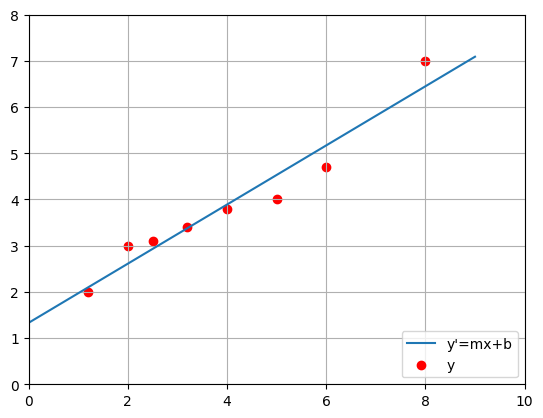

In [59]:

fig,ax=plt.subplots()
ax.plot(x_line,y_line, label='y\'=mx+b')
ax.scatter(x,y,color='r', label="y")
ax.set_ylim(0,8)
ax.set_xlim(0,10)
ax.grid()
ax.legend(loc ="lower right")
plt.show()

In [60]:
# Calculamos la Y bruta con la formula y el X original

y_prima = []

for x_val in x:
  y_prima.append(round(f(x_val,m,b),2))

print(y_prima)

[2.1, 2.61, 3.38, 2.93, 4.53, 5.17, 3.89, 6.45]


In [61]:
# Formula para el ECM
def calc_ecm(y,y_prima):
  sum=0
  for i in range(len(y)):
    sum+=(y_prima[i]-y[i])**2
  return sum/len(y)

In [62]:
# EMC

emc=calc_ecm(y,y_prima)

print(f'el error cuadratico medio es {emc}' )

el error cuadratico medio es 0.125475


## Ejercicio con Numpy y Pandas

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [80]:
x = np.array([1.2, 2, 3.2, 2.5, 5, 6, 4, 8])
y = np.array([2, 3, 3.4, 3.1, 4, 4.7, 3.8, 7])
n = len(x)

sum_x = np.sum(x, axis=0) # 31.9
sum_y = np.sum(y, axis=0) # 31

x_2 = np.sum(x**2,axis=0) # 162.93

xy = np.sum((x*y),axis=0) # 146.43

def m():
    numerador = n * xy - (sum_x * sum_y)
    denominador = n * x_2 - (sum_x**2) 
    return np.divide(numerador,denominador)
m = m()

def b():
    numerador = sum_y - (m*sum_x)
    denominador = n
    return np.divide(numerador,denominador)
b = b()

def f():
    return (m*x) + b

y_bruta = f()
print(y_bruta)

[2.0948151  2.60572018 3.37207781 2.92503586 4.52161425 5.1602456
 3.88298289 6.43750831]


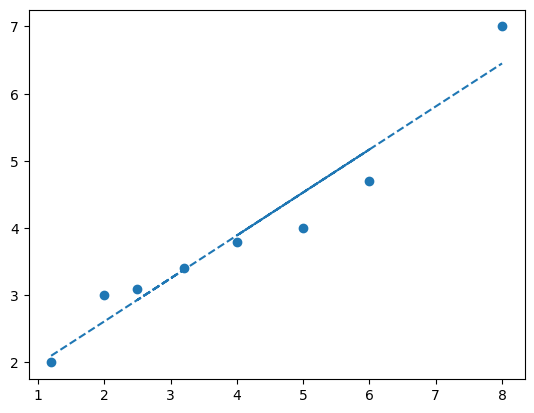

In [81]:
# Graficamos
plt.scatter(x,y)
plt.plot(x,y_prima, '--')

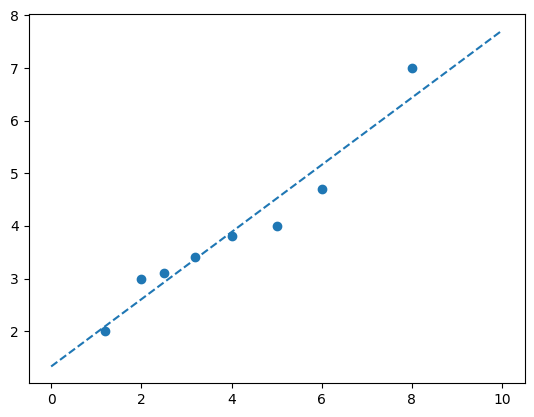

In [83]:
x3 = np.linspace(0,10,8)

def f():
    return (m*x3) + b

y3 = f()
# Graficamos
plt.scatter(x,y)
plt.plot(x3,y3, '--')
